In [11]:
# ====================== PIP INSTALL COMMANDS ===========================
# For Google Colab / Kaggle etc:
# -----------------------------------------------------
!pip install fugashi ipadic unidic-lite
!pip install xgboost optuna shap scikit-learn pandas matplotlib seaborn
!pip install sentence-transformers pyyaml

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


========== EDA & BUSINESS INSIGHTS (TRAIN DATA) ==========

=== EXECUTIVE SUMMARY ===
Total Reviews Analyzed: 33,698
Sentiment Distribution:
  • Negative: 40.9%
  • Positive: 32.0%
  • Neutral: 27.1%


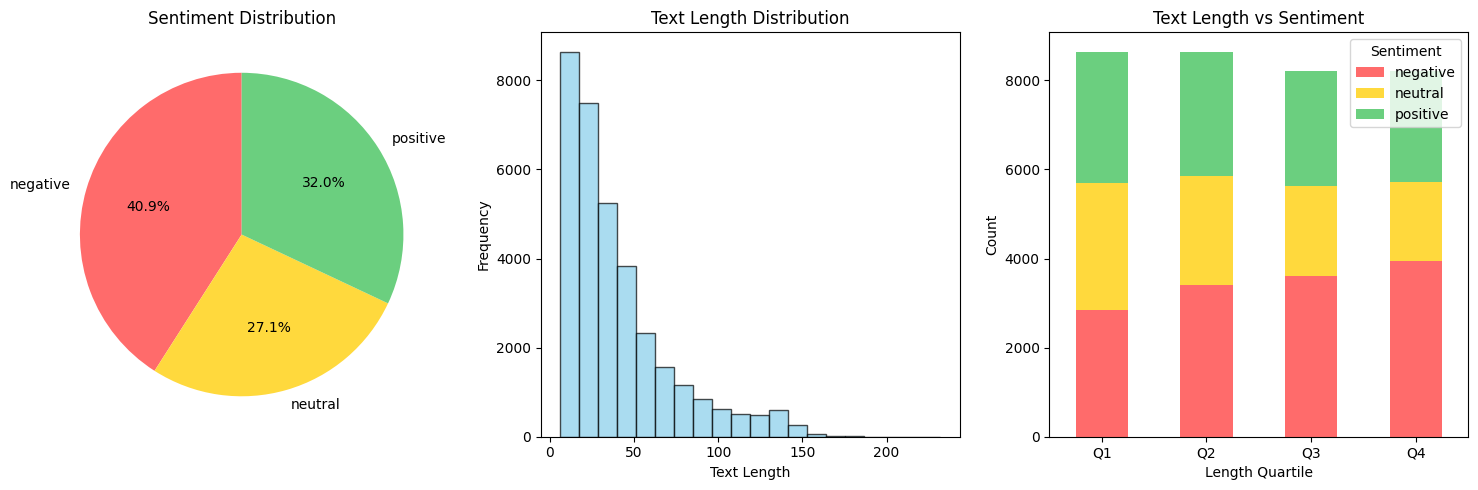

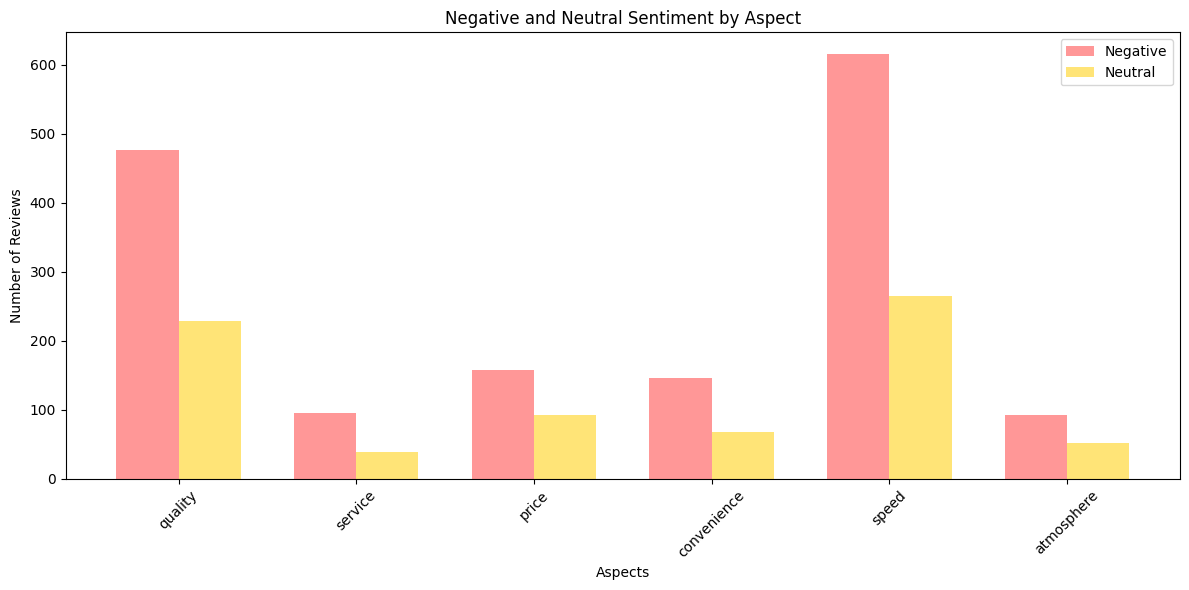

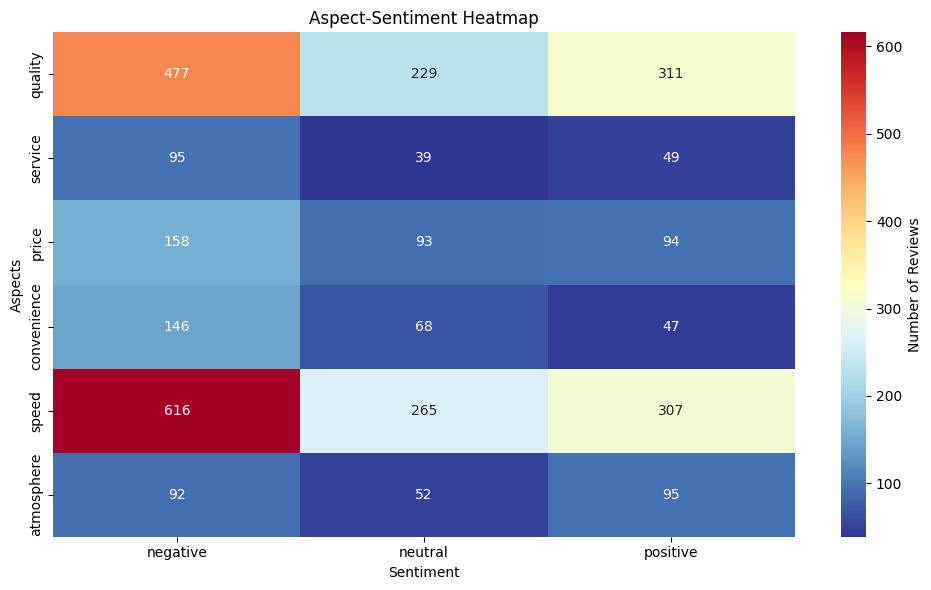


=== BUSINESS INSIGHTS & RECOMMENDATIONS ===
• QUALITY: 1017 mentions, 46.9% negative, 22.5% neutral
• SERVICE: 183 mentions, 51.9% negative, 21.3% neutral
• PRICE: 345 mentions, 45.8% negative, 27.0% neutral
• CONVENIENCE: 261 mentions, 55.9% negative, 26.1% neutral
• SPEED: 1188 mentions, 51.9% negative, 22.3% neutral
• ATMOSPHERE: 239 mentions, 38.5% negative, 21.8% neutral
Generating embeddings for 33698 reviews ...


Batches:   0%|          | 0/264 [00:00<?, ?it/s]

Generating embeddings for 8425 reviews ...


Batches:   0%|          | 0/66 [00:00<?, ?it/s]

[I 2025-07-02 12:31:57,383] A new study created in memory with name: no-name-cb56c431-1c36-467a-9134-20e4650be29c



========== Running Optuna for XGBoost params + class weights ==========


[I 2025-07-02 12:33:02,834] Trial 0 finished with value: 0.41347394981754404 and parameters: {'max_depth': 4, 'learning_rate': 0.011344052065553346, 'n_estimators': 362, 'subsample': 0.7275080705166355, 'colsample_bytree': 0.889280165163683, 'gamma': 2.215881816689757, 'lambda': 0.12122793454182955, 'alpha': 0.021011769291127618, 'min_child_weight': 6, 'weight_neg': 0.896486134443796, 'weight_neu': 1.737585581990999, 'weight_pos': 0.8477826235756307}. Best is trial 0 with value: 0.41347394981754404.
[I 2025-07-02 12:33:36,504] Trial 1 finished with value: 0.349281566131604 and parameters: {'max_depth': 3, 'learning_rate': 0.08416802647268427, 'n_estimators': 226, 'subsample': 0.83290941838152, 'colsample_bytree': 0.7065784849502084, 'gamma': 0.9757374496720683, 'lambda': 0.002154147634370631, 'alpha': 5.358619118121209, 'min_child_weight': 1, 'weight_neg': 0.9077031958112595, 'weight_neu': 1.109251721831284, 'weight_pos': 1.194318522341752}. Best is trial 1 with value: 0.34928156613160

Best params: {'max_depth': 8, 'learning_rate': 0.09011509166075182, 'n_estimators': 394, 'subsample': 0.9499122398394866, 'colsample_bytree': 0.8074130148314028, 'gamma': 0.12959815692478793, 'lambda': 9.624415747152636, 'alpha': 0.1332483069508506, 'min_child_weight': 2, 'objective': 'multi:softprob', 'num_class': 3, 'use_label_encoder': False, 'tree_method': 'gpu_hist', 'random_state': 42}
Best class weights: [0.8151997561797412, 1.3679647837058064, 1.0645038821439594]

=== Test Results ===
              precision    recall  f1-score   support

    negative       0.72      0.78      0.75      3391
     neutral       0.56      0.49      0.52      2347
    positive       0.69      0.70      0.70      2687

    accuracy                           0.67      8425
   macro avg       0.66      0.65      0.65      8425
weighted avg       0.67      0.67      0.67      8425

Accuracy: 0.6717

=== Confusion Matrix ===


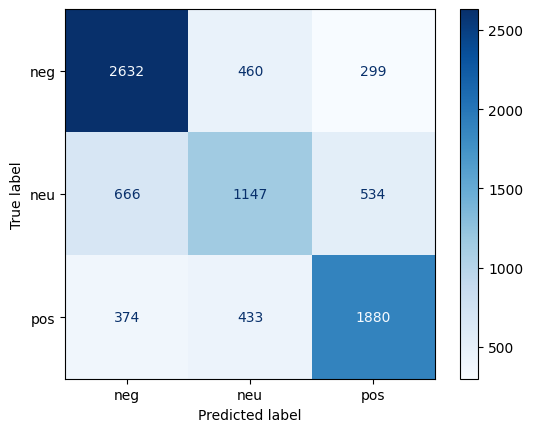


Top 10 (Non-Embedding) Features:
               feature  importance
4        aspect_speed    0.002937
6         text_length    0.001290
0      aspect_quality    0.000000
2        aspect_price    0.000000
1      aspect_service    0.000000
3  aspect_convenience    0.000000
5   aspect_atmosphere    0.000000


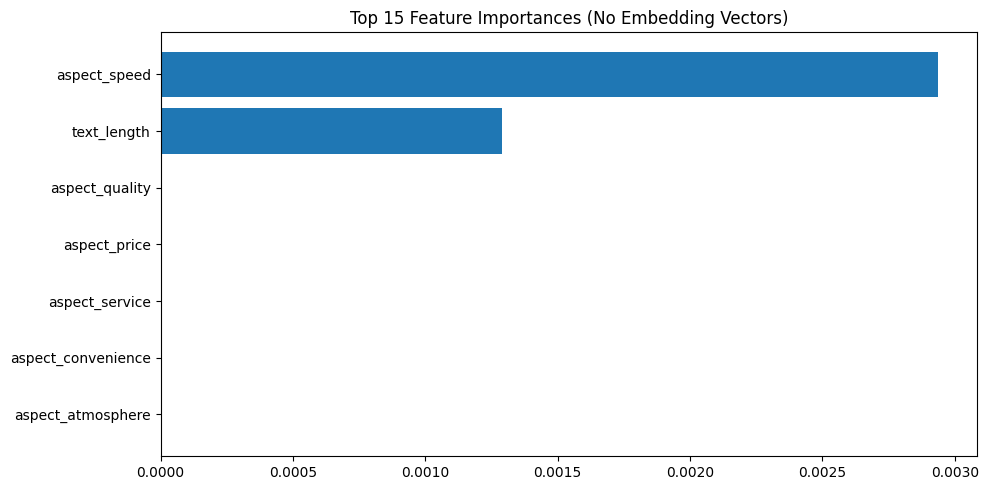


=== SHAP Summary Plot (Main Features Only) ===
SHAP plot skipped: This reshape error is often caused by passing a bad data matrix to SHAP. See https://github.com/shap/shap/issues/580.

========== BUSINESS INSIGHTS (TEST SET PREDICTED) ==========

=== EXECUTIVE SUMMARY ===
Total Reviews Analyzed: 8,425
Sentiment Distribution:
  • Negative: 43.6%
  • Positive: 32.2%
  • Neutral: 24.2%

=== BUSINESS INSIGHTS & RECOMMENDATIONS ===
• QUALITY: 251 mentions, 52.6% negative, 22.3% neutral
• SERVICE: 40 mentions, 52.5% negative, 15.0% neutral
• PRICE: 72 mentions, 36.1% negative, 30.6% neutral
• CONVENIENCE: 65 mentions, 61.5% negative, 23.1% neutral
• SPEED: 307 mentions, 59.0% negative, 19.5% neutral
• ATMOSPHERE: 38 mentions, 57.9% negative, 13.2% neutral


In [14]:
# !pip install sentence-transformers xgboost optuna scikit-learn matplotlib seaborn pyyaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import yaml, json, re, os, requests, gc, warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import shap
from sentence_transformers import SentenceTransformer

warnings.filterwarnings("ignore")

# ---- BusinessInsightExtractor (unchanged, only plotting & logic) ----
class BusinessInsightExtractor:
    def __init__(self, aspects=None, label_map=None):
        if aspects is not None:
            self.aspects = aspects
            print(f"Loaded {len(aspects)} aspects from config/data.")
        else:
            self.aspects = {
                'quality': ['品質', '質', '良い', '悪い', '高品質', '低品質', 'クオリティ'],
                'service': ['サービス', '対応', '接客', '親切', '丁寧', '態度'],
                'price': ['価格', '値段', '料金', '安い', '高い', 'コスト', '費用'],
                'convenience': ['便利', '不便', '簡単', '難しい', '使いやすい', '使いにくい'],
                'speed': ['速い', '遅い', '早い', 'スピード', '迅速', '時間'],
                'atmosphere': ['雰囲気', '環境', '空間', '居心地', '快適', '不快']
            }
        self.label_map = label_map or {0: "negative", 1: "neutral", 2: "positive"}

    def generate_business_recommendations(self, df):
        print("\n=== BUSINESS INSIGHTS & RECOMMENDATIONS ===")
        for aspect in self.aspects.keys():
            aspect_col = f'aspect_{aspect}'
            if aspect_col in df.columns:
                aspect_mentions = df[df[aspect_col] == 1].shape[0]
                negative_mentions = df[(df[aspect_col] == 1) & (df['sentiment'] == 0)].shape[0]
                neutral_mentions = df[(df[aspect_col] == 1) & (df['sentiment'] == 1)].shape[0]
                if aspect_mentions > 0:
                    negative_rate = negative_mentions / aspect_mentions * 100
                    neutral_rate = neutral_mentions / aspect_mentions * 100
                    print(f"• {aspect.upper()}: {aspect_mentions} mentions, {negative_rate:.1f}% negative, {neutral_rate:.1f}% neutral")
        return {"status": "completed"}

    @staticmethod
    def executive_summary(df, label_map=None):
        print("\n=== EXECUTIVE SUMMARY ===")
        total_reviews = len(df)
        sentiment_dist = df['sentiment'].value_counts(normalize=True) * 100
        lm = label_map or {0: 'negative', 1: 'neutral', 2: 'positive'}
        print(f"Total Reviews Analyzed: {total_reviews:,}")
        print("Sentiment Distribution:")
        for sentiment, pct in sentiment_dist.items():
            label = lm[sentiment] if sentiment in lm else str(sentiment)
            print(f"  • {label.capitalize()}: {pct:.1f}%")

    @staticmethod
    def plot_overall_sentiment(df, label_map=None):
        plt.figure(figsize=(15, 5))
        lm = label_map or {0: 'negative', 1: 'neutral', 2: 'positive'}
        sentiment_counts = df['sentiment'].map(lm).value_counts().reindex(['negative', 'neutral', 'positive'], fill_value=0)
        colors = {'negative': '#ff6b6b', 'neutral': '#ffd93d', 'positive': '#6bcf7f'}
        plt.subplot(1, 3, 1)
        plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%',
                colors=[colors[s] for s in sentiment_counts.index], startangle=90)
        plt.title('Sentiment Distribution')
        plt.subplot(1, 3, 2)
        plt.hist(df['text_length'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
        plt.xlabel('Text Length')
        plt.ylabel('Frequency')
        plt.title('Text Length Distribution')
        plt.subplot(1, 3, 3)
        df['length_quartile'] = pd.qcut(df['text_length'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
        ctab = pd.crosstab(df['length_quartile'], df['sentiment'].map(lm))
        ctab[['negative', 'neutral', 'positive']].plot(kind='bar', stacked=True, ax=plt.gca(),
            color=[colors['negative'], colors['neutral'], colors['positive']])
        plt.title('Text Length vs Sentiment')
        plt.xlabel('Length Quartile')
        plt.ylabel('Count')
        plt.legend(title='Sentiment')
        plt.xticks(rotation=0)
        plt.tight_layout()
        plt.show()

    @staticmethod
    def plot_negative_aspect_breakdown(df):
        aspects = list(df.columns[df.columns.str.startswith('aspect_')].str.replace('aspect_', ''))
        negative_counts, neutral_counts = [], []
        for aspect in aspects:
            aspect_col = f'aspect_{aspect}'
            if aspect_col in df.columns:
                neg_count = df[(df[aspect_col] == 1) & (df['sentiment'] == 0)].shape[0]
                neu_count = df[(df[aspect_col] == 1) & (df['sentiment'] == 1)].shape[0]
                negative_counts.append(neg_count)
                neutral_counts.append(neu_count)
            else:
                negative_counts.append(0)
                neutral_counts.append(0)
        if aspects and any(negative_counts + neutral_counts):
            plt.figure(figsize=(12, 6))
            x = np.arange(len(aspects))
            width = 0.35
            plt.bar(x - width/2, negative_counts, width, label='Negative', color='#ff6b6b', alpha=0.7)
            plt.bar(x + width/2, neutral_counts, width, label='Neutral', color='#ffd93d', alpha=0.7)
            plt.title('Negative and Neutral Sentiment by Aspect')
            plt.xlabel('Aspects')
            plt.ylabel('Number of Reviews')
            plt.xticks(x, aspects, rotation=45)
            plt.legend()
            plt.tight_layout()
            plt.show()

    @staticmethod
    def plot_aspect_sentiment_heatmap(df):
        aspects = list(df.columns[df.columns.str.startswith('aspect_')].str.replace('aspect_', ''))
        sentiments = [0, 1, 2]
        sentiment_labels = ['negative', 'neutral', 'positive']
        if not aspects:
            print("No aspects found for heatmap visualization")
            return
        heatmap_data = []
        for aspect in aspects:
            aspect_col = f'aspect_{aspect}'
            row = []
            for sentiment in sentiments:
                if aspect_col in df.columns:
                    count = df[(df[aspect_col] == 1) & (df['sentiment'] == sentiment)].shape[0]
                    row.append(count)
                else:
                    row.append(0)
            heatmap_data.append(row)
        if any(any(row) for row in heatmap_data):
            plt.figure(figsize=(10, 6))
            sns.heatmap(heatmap_data,
                        xticklabels=sentiment_labels,
                        yticklabels=aspects,
                        annot=True,
                        fmt='d',
                        cmap='RdYlBu_r',
                        cbar_kws={'label': 'Number of Reviews'})
            plt.title('Aspect-Sentiment Heatmap')
            plt.xlabel('Sentiment')
            plt.ylabel('Aspects')
            plt.tight_layout()
            plt.show()


# ---- JapaneseABSAXGBoostOptunaPipeline: Embeddings for modeling, skip for EDA ----
class JapaneseABSAXGBoostOptunaPipeline:
    def __init__(self, n_splits=5, embedding_model_name="intfloat/multilingual-e5-base",use_gpu=False):
        self.insight_extractor = BusinessInsightExtractor()
        self.n_splits = n_splits
        self.embedding_model_name = embedding_model_name
        self.embedding_model = SentenceTransformer(embedding_model_name)
        self.embedding_dim = self.embedding_model.get_sentence_embedding_dimension()
        self.use_gpu = use_gpu

    def download_wrime_dataset(self):
        wrime_url = "https://raw.githubusercontent.com/ids-cv/wrime/refs/heads/master/wrime-ver1.tsv"
        wrime_path = "/tmp/wrime-ver1.tsv"
        if not os.path.exists(wrime_path):
            response = requests.get(wrime_url, timeout=30)
            response.raise_for_status()
            with open(wrime_path, 'w', encoding='utf-8') as f:
                f.write(response.text)
        return wrime_path

    def load_and_preprocess_data(self):
        dataset_path = self.download_wrime_dataset()
        df = pd.read_csv(dataset_path, sep='\t', encoding='utf-8')
        if 'Sentence' in df.columns:
            df['review_text'] = df['Sentence']
        else:
            text_cols = [col for col in df.columns if 'text' in col.lower()]
            df['review_text'] = df[text_cols[0]]
        df = df.dropna(subset=['review_text'])
        df = df[df['review_text'].astype(str).str.len() > 5]
        df = df.sample(frac=1, random_state=42).reset_index(drop=True)
        # Sentiment label creation
        emotion_cols = ['Avg. Readers_Joy', 'Avg. Readers_Sadness', 'Avg. Readers_Anger',
                        'Avg. Readers_Fear', 'Avg. Readers_Surprise', 'Avg. Readers_Disgust']
        for col in emotion_cols:
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)
        df['positive_score'] = df['Avg. Readers_Joy'] + (df['Avg. Readers_Surprise'] * 0.5)
        df['negative_score'] = (df['Avg. Readers_Sadness'] + df['Avg. Readers_Anger'] +
                                df['Avg. Readers_Fear'] + df['Avg. Readers_Disgust'])
        def determine_sentiment(row):
            pos_score = row['positive_score']
            neg_score = row['negative_score']
            total_score = pos_score + neg_score
            if total_score < 0.5: return 1  # neutral
            if pos_score > neg_score and pos_score > 0.8: return 2  # positive
            if neg_score > pos_score and neg_score > 0.8: return 0  # negative
            return 1  # neutral
        df['sentiment'] = df.apply(determine_sentiment, axis=1)
        return df

    def extract_features(self, df, fit_scaler=False, scaler=None, skip_embedding=False):
        # Always add aspects & text_length (for EDA and for modeling)
        aspects = self.insight_extractor.aspects
        for aspect, keywords in aspects.items():
            pattern = '|'.join([re.escape(kw) for kw in keywords])
            df[f'aspect_{aspect}'] = df['review_text'].str.contains(pattern, na=False, regex=True).astype(int)
        df['text_length'] = df['review_text'].str.len()
        if skip_embedding:
            return df if not fit_scaler else (df, None)
        # --- Embedding for modeling ---
        print(f"Generating embeddings for {len(df)} reviews ...")
        embs = self.embedding_model.encode(df['review_text'].tolist(), show_progress_bar=True, batch_size=128, normalize_embeddings=True)
        for i in range(self.embedding_dim):
            df[f'emb_{i}'] = embs[:, i]
        if fit_scaler:
            scaler = StandardScaler()
            emb_cols = [f'emb_{i}' for i in range(self.embedding_dim)]
            df[emb_cols] = scaler.fit_transform(df[emb_cols])
            return df, scaler
        else:
            emb_cols = [f'emb_{i}' for i in range(self.embedding_dim)]
            if scaler is not None:
                df[emb_cols] = scaler.transform(df[emb_cols])
            return df

    def prepare_X_y(self, df):
        feature_cols = [col for col in df.columns if col.startswith('aspect_') or col.startswith('emb_') or col == 'text_length']
        X = df[feature_cols].values
        y = df['sentiment'].values
        return X, y, feature_cols

    def fit(self):
        df = self.load_and_preprocess_data()
        n_train = int(len(df) * 0.8)
        train_df = df.iloc[:n_train].copy()
        test_df = df.iloc[n_train:].copy()

        train_df, scaler = self.extract_features(train_df, fit_scaler=True)
        test_df = self.extract_features(test_df, fit_scaler=False, scaler=scaler)

        X, y, feature_cols = self.prepare_X_y(train_df)
        X_test, y_test, _ = self.prepare_X_y(test_df)
        skf = StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=42)

        # ---- XGBoost + Optuna (with class weights) ----
        def objective(trial):
            param = {
                "objective": "multi:softprob",
                "num_class": 3,
                "eval_metric": "mlogloss",
                "max_depth": trial.suggest_int("max_depth", 3, 8),
                "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
                "n_estimators": trial.suggest_int("n_estimators", 100, 400),
                "subsample": trial.suggest_float("subsample", 0.7, 1.0),
                "colsample_bytree": trial.suggest_float("colsample_bytree", 0.7, 1.0),
                "gamma": trial.suggest_float("gamma", 0, 5),
                "lambda": trial.suggest_float("lambda", 1e-3, 10.0, log=True),
                "alpha": trial.suggest_float("alpha", 1e-3, 10.0, log=True),
                "min_child_weight": trial.suggest_int("min_child_weight", 1, 7),
                "tree_method": "gpu_hist" if self.use_gpu else "auto",
                "use_label_encoder": False,
                "verbosity": 0,
                "random_state": 42
            }
            w_neg = trial.suggest_float("weight_neg", 0.8, 1.2)
            w_neu = trial.suggest_float("weight_neu", 1.0, 2.5)
            w_pos = trial.suggest_float("weight_pos", 0.8, 1.2)
            class_weights = np.array([w_neg, w_neu, w_pos])
            scores = []
            for train_idx, val_idx in skf.split(X, y):
                X_tr, X_val = X[train_idx], X[val_idx]
                y_tr, y_val = y[train_idx], y[val_idx]
                sample_weight = class_weights[y_tr]
                model = xgb.XGBClassifier(**param)
                model.fit(X_tr, y_tr, sample_weight=sample_weight)
                preds = np.argmax(model.predict_proba(X_val), axis=1)
                _, _, f1, _ = precision_recall_fscore_support(y_val, preds, average='weighted', zero_division=0)
                scores.append(f1)
            return 1.0 - np.mean(scores)
        print("\n========== Running Optuna for XGBoost params + class weights ==========")
        study = optuna.create_study(direction="minimize")
        study.optimize(objective, n_trials=20)
        best_params = study.best_trial.params
        # Extract weights from best params
        best_weights = [best_params.pop("weight_neg"), best_params.pop("weight_neu"), best_params.pop("weight_pos")]
        best_params.update({
            "objective": "multi:softprob",
            "num_class": 3,
            "use_label_encoder": False,
            "tree_method": "gpu_hist" if self.use_gpu else "auto",
            "random_state": 42
        })
        print("Best params:", best_params)
        print("Best class weights:", best_weights)
        sample_weight_final = np.array(best_weights)[y]
        final_model = xgb.XGBClassifier(**best_params)
        final_model.fit(X, y, sample_weight=sample_weight_final)
        preds = np.argmax(final_model.predict_proba(X_test), axis=1)

        # ---- Classification Metrics/Results ----
        print("\n=== Test Results ===")
        print(classification_report(y_test, preds, target_names=['negative', 'neutral', 'positive']))
        acc = accuracy_score(y_test, preds)
        print(f"Accuracy: {acc:.4f}")

        print("\n=== Confusion Matrix ===")
        cm = confusion_matrix(y_test, preds)
        disp = ConfusionMatrixDisplay(cm, display_labels=['neg', 'neu', 'pos'])
        disp.plot(cmap="Blues")
        plt.show()

        # ---- Feature Importance ----
        non_emb_cols = [col for col in feature_cols if not col.startswith("emb_")]
        # Only show aspect and text_length features in importance output
        importances = final_model.feature_importances_
        imp_df = pd.DataFrame({"feature": feature_cols, "importance": importances})
        imp_df = imp_df[imp_df["feature"].isin(non_emb_cols)]
        imp_df = imp_df.sort_values(by="importance", ascending=False)
        print("\nTop 10 (Non-Embedding) Features:\n", imp_df.head(10))
        plt.figure(figsize=(10,5))
        plt.barh(imp_df.head(15)['feature'][::-1], imp_df.head(15)['importance'][::-1])
        plt.title("Top 15 Feature Importances (No Embedding Vectors)")
        plt.tight_layout()
        plt.show()

        # ---- SHAP summary (main features only, optional) ----
        try:
            print("\n=== SHAP Summary Plot (Main Features Only) ===")
            explainer = shap.TreeExplainer(final_model)
            X_shap = pd.DataFrame(X_test, columns=feature_cols)[non_emb_cols]
            shap_values = explainer.shap_values(X_shap)
            shap.summary_plot(shap_values, X_shap, feature_names=non_emb_cols, show=True, max_display=15)
        except Exception as e:
            print("SHAP plot skipped:", e)

        # ---- Return results for further use ----
        test_df['sentiment'] = preds
        return {
            "model": final_model,
            "test_df": test_df,
            "feature_importance": imp_df,
            "optuna_study": study
        }

# ========== MAIN SCRIPT (separation of BI/EDA and pipeline) ==========
if __name__ == "__main__":
    pipeline = JapaneseABSAXGBoostOptunaPipeline(use_gpu=True)
    df = pipeline.load_and_preprocess_data()
    n_train = int(len(df) * 0.8)
    train_df = df.iloc[:n_train].copy()
    test_df = df.iloc[n_train:].copy()

    # --- Add aspect and text_length cols to train_df/test_df for EDA/BI, SKIP embeddings for speed ---
    train_df_eda = pipeline.extract_features(train_df.copy(), skip_embedding=True)
    BI = pipeline.insight_extractor
    print("========== EDA & BUSINESS INSIGHTS (TRAIN DATA) ==========")
    BI.executive_summary(train_df_eda)
    BI.plot_overall_sentiment(train_df_eda)
    BI.plot_negative_aspect_breakdown(train_df_eda)
    BI.plot_aspect_sentiment_heatmap(train_df_eda)
    BI.generate_business_recommendations(train_df_eda)

    # ---- Run embedding-based XGBoost pipeline ----
    result = pipeline.fit()

    # ---- Single Business Insights set on test predictions ----
    print("\n========== BUSINESS INSIGHTS (TEST SET PREDICTED) ==========")
    test_pred = result['test_df']
    BI.executive_summary(test_pred)
    BI.generate_business_recommendations(test_pred)
